<a href="https://colab.research.google.com/github/juliaradula/rhizomucor_miehei_transcriptome/blob/main/transcriptome_mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
trinotate = pd.read_csv("/content/drive/MyDrive/RMA/Trinotate.RMA.xls", sep="\t")
trinotate.shape

(69080, 16)

In [4]:
anotados = pd.read_csv("/content/drive/MyDrive/anotadosRMA.csv")
anotados.shape

(44683, 35)

In [5]:
enzimas = pd.read_csv("/content/drive/MyDrive/enzimasRMA.csv")
enzimas.shape

(18687, 3)

In [6]:
hidrolases = pd.DataFrame(enzimas[enzimas["EC number"].str.match("^3.*") == True])
hidrolases

,DN,EC number,tpm
0,DN5061,3.1.2.-; 3.1.2.2,9.893560
38,DN14801,3.1.3.33; 2.7.7.50,1127.004947
39,DN14801,3.1.3.33; 2.7.7.50,1127.004947
40,DN14801,3.1.3.33; 2.7.7.50,1127.004947
41,DN14801,3.1.3.33; 2.7.7.50,1127.004947
...,...,...,...
18679,DN21038,3.6.4.-,8.481590
18680,DN21028,3.6.4.-,19.901850
18681,DN21028,3.6.4.-,19.901850
18682,DN21028,3.6.4.-,19.901850


In [7]:
hidrolases.shape

(5879, 3)

In [8]:
peptidases = pd.DataFrame(enzimas[enzimas["EC number"].str.match("^3.4.*") == True])

In [9]:
peptidases.shape

(1362, 3)

In [10]:
enzimas.dtypes

DN            object
EC number     object
tpm          float64
dtype: object

In [11]:
enzimas2 = enzimas.drop_duplicates()
enzimas2

,DN,EC number,tpm
0,DN5061,3.1.2.-; 3.1.2.2,9.893560
1,DN5023,6.1.1.5,7.391160
3,DN15190,6.1.1.5,45.590660
5,DN12584,6.1.1.5,5.051480
7,DN8233,6.1.1.5,8.026920
...,...,...,...
18677,DN21097,2.7.7.49,94.184985
18679,DN21038,3.6.4.-,8.481590
18680,DN21028,3.6.4.-,19.901850
18683,DN21028,3.6.4.12,19.901850


In [12]:
hidrolases2 = pd.DataFrame(enzimas2[enzimas2["EC number"].str.match("^3.*") == True])
hidrolases2

,DN,EC number,tpm
0,DN5061,3.1.2.-; 3.1.2.2,9.893560
38,DN14801,3.1.3.33; 2.7.7.50,1127.004947
42,DN5045,3.5.1.41,582.133000
43,DN1513,3.5.1.41,2.097720
44,DN1589,3.5.1.41,3.338240
...,...,...,...
18650,DN9353,3.1.4.54,4.174610
18658,DN9354,3.1.26.3,30.696380
18679,DN21038,3.6.4.-,8.481590
18680,DN21028,3.6.4.-,19.901850


In [13]:
hidrolases2["tpm"].sum()

95442.97279525876

In [14]:
oxirresutases2 = pd.DataFrame(enzimas2[enzimas2["EC number"].str.match("^1.*") == True])
transferases2 = pd.DataFrame(enzimas2[enzimas2["EC number"].str.match("^2.*") == True])
liases2 = pd.DataFrame(enzimas2[enzimas2["EC number"].str.match("^4.*") == True])
isomerases2 = pd.DataFrame(enzimas2[enzimas2["EC number"].str.match("^5.*") == True])
ligases2 = pd.DataFrame(enzimas2[enzimas2["EC number"].str.match("^6.*") == True])
translocases2 = pd.DataFrame(enzimas2[enzimas2["EC number"].str.match("^7.*") == True])

In [15]:
print(oxirresutases2.shape, transferases2.shape, hidrolases2.shape, liases2.shape, isomerases2.shape, ligases2.shape, translocases2.shape)

(1004, 3) (2256, 3) (1863, 3) (240, 3) (178, 3) (281, 3) (138, 3)


In [16]:
classe_enzimas_dict = {"Classe":["Translocases", "Ligases", "Isomerases", "Liases",  "Hidrolases",  "Transferases", "Oxirredutases"], "tpm" : [translocases2["tpm"].sum(), ligases2["tpm"].sum(), isomerases2["tpm"].sum(), liases2["tpm"].sum(), hidrolases2["tpm"].sum(), transferases2["tpm"].sum(), oxirresutases2["tpm"].sum()]}
classe_enzimas_df = pd.DataFrame(data=classe_enzimas_dict)
classe_enzimas_df

,Classe,tpm
0,Translocases,17779.661605
1,Ligases,9495.025429
2,Isomerases,10862.491421
3,Liases,15415.974518
4,Hidrolases,95442.972795
5,Transferases,82284.514472
6,Oxirredutases,70102.937805


In [17]:
cm = 1/2.54

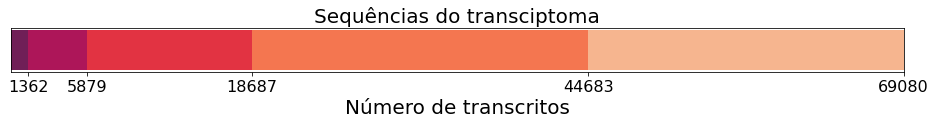

In [29]:
classe = ["Transcritos"]
fig, ax = plt.subplots(figsize=(16,0.8))
ax.set_xlabel("Número de transcritos", fontdict={"fontsize": 20})
plt.xticks([1362, 5879, 18687, 44683, 69080], fontsize=16)#, rotation=45)
plt.yticks([])
plt.title("Sequências do transciptoma", fontdict={"fontsize":20})

ax.barh(classe, peptidases.shape[0], color="#701F57", label="Peptidases")
ax.barh(classe, hidrolases.shape[0]-peptidases.shape[0], color =  "#AD1659" , left = peptidases.shape[0], label="Hidrolases")
ax.barh(classe, enzimas.shape[0]-hidrolases.shape[0], color = "#E23342", left = hidrolases.shape[0], label="Enzimas")
ax.barh(classe, anotados.shape[0]-enzimas.shape[0], color = "#F47650", left = enzimas.shape[0], label="Transcritos anotados")
ax.barh(classe, trinotate.shape[0]-anotados.shape[0], color = "#F6B58F", left = anotados.shape[0], label="Total de transcritos")
ax.set_xlim(0,69080)


#plt.legend(fontsize=10, loc=4)
plt.savefig("/content/drive/MyDrive/sequencias_transcriptoma_RMA.png", bbox_inches='tight')

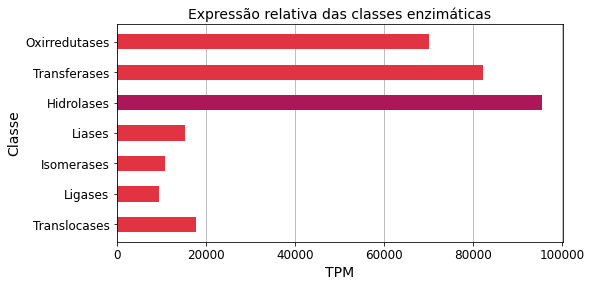

In [31]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_xlabel("TPM", fontdict={"fontsize":14})
ax.set_ylabel("Classe", fontdict={"fontsize":14})
plt.title("Expressão relativa das classes enzimáticas", fontdict={"fontsize":14})
plt.xticks(fontsize=12)#, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='x')
ax.set_axisbelow(True)


ax.barh(classe_enzimas_df["Classe"], classe_enzimas_df["tpm"], color= ["#E23342", "#E23342", "#E23342", "#E23342", "#AD1659", "#E23342", "#E23342"], height=0.5)

plt.savefig("/content/drive/MyDrive/expressao_enzimas_RMA.png", bbox_inches='tight')

In [32]:
hidrolases2["tpm"].sum()

95442.97279525876

In [33]:
hydro_unique = hidrolases2["EC number"].unique()
hydro_unique.sort()
hydro_unique

array(['3.-.-.-', '3.1.-.-', '3.1.-.-; 3.1.1.23', '3.1.-.-; 3.6.4.12',
       '3.1.1.-', '3.1.1.-; 3.1.1.23; 3.1.-.-', '3.1.1.1', '3.1.1.106',
       '3.1.1.106; 3.2.2.-', '3.1.1.11', '3.1.1.13', '3.1.1.23',
       '3.1.1.24', '3.1.1.29', '3.1.1.2; 3.1.1.81; 3.1.8.1', '3.1.1.3',
       '3.1.1.31', '3.1.1.32; 3.1.1.4', '3.1.1.4', '3.1.1.45',
       '3.1.1.4; 3.1.1.5', '3.1.1.4; 3.1.1.5; 2.3.1.-', '3.1.1.5',
       '3.1.1.5; 3.1.1.4; 3.1.1.3', '3.1.1.5; 3.5.1.1; 3.1.1.47',
       '3.1.1.6', '3.1.1.64; 5.3.3.22', '3.1.1.65', '3.1.1.79; 3.1.1.23',
       '3.1.1.83', '3.1.1.89', '3.1.1.96', '3.1.1.97', '3.1.1.n2',
       '3.1.11.1; 3.1.13.-', '3.1.11.2', '3.1.13.-', '3.1.13.-; 3.1.26.-',
       '3.1.13.1', '3.1.13.4', '3.1.2.-', '3.1.2.-; 3.1.2.2',
       '3.1.2.-; 3.1.2.4', '3.1.2.-; 3.5.1.-; 3.5.1.124', '3.1.2.1',
       '3.1.2.12', '3.1.2.12; 3.1.1.56',
       '3.1.2.1; 3.1.2.11; 3.1.2.2; 3.1.2.3; 3.1.2.5; 3.1.2.27',
       '3.1.2.20', '3.1.2.22', '3.1.2.22; 3.1.1.93', '3.1.2.4', '3.1.2.

In [34]:
ester_bonds = pd.DataFrame(enzimas2[enzimas2["EC number"].str.match("^3.1.*") == True])
glycosylases = pd.DataFrame(enzimas2[enzimas2["EC number"].str.match("^3.2.*") == True])
ether_bonds = pd.DataFrame(enzimas2[enzimas2["EC number"].str.match("^3.3.*") == True])
peptidases2 = pd.DataFrame(enzimas2[enzimas2["EC number"].str.match("^3.4.*") == True])
carbon_nitrogen_bonds = pd.DataFrame(enzimas2[enzimas2["EC number"].str.match("^3.5.*") == True])
acid_anhydrides = pd.DataFrame(enzimas2[enzimas2["EC number"].str.match("^3.6.*") == True])
carbon_carbon_bonds = pd.DataFrame(enzimas2[enzimas2["EC number"].str.match("^3.7.*") == True])
halide_bonds = pd.DataFrame(enzimas2[enzimas2["EC number"].str.match("^3.8.*") == True])

In [35]:
classe_hydro_dict = {"Classe" : ["Ação em ligações C-C", "Ação em ácidos anidros", "Ação em ligações C-N\n não peptídicas", "Peptidases", "Ação em ligações éster", "Glicosilases", "Ação em ligações éter"], "tpm" : [carbon_carbon_bonds["tpm"].sum(), acid_anhydrides["tpm"].sum(), carbon_nitrogen_bonds["tpm"].sum(), peptidases2["tpm"].sum(), ether_bonds["tpm"].sum(), glycosylases["tpm"].sum(), ester_bonds["tpm"].sum()]}

# "Ação em ligações haleto", halide_bonds["tpm"].sum()
classe_hydro_df = pd.DataFrame(data=classe_hydro_dict)
classe_hydro_df

,Classe,tpm
0,Ação em ligações C-C,556.569154
1,Ação em ácidos anidros,19273.374358
2,Ação em ligações C-N\n não peptídicas,10694.172141
3,Peptidases,17536.799321
4,Ação em ligações éster,945.615099
5,Glicosilases,3660.557160
6,Ação em ligações éter,40894.839161


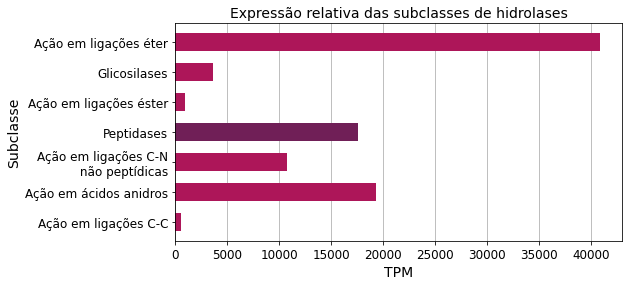

In [37]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_xlabel("TPM", fontdict={"fontsize":14})
ax.set_ylabel("Subclasse", fontdict={"fontsize":14})
plt.title("Expressão relativa das subclasses de hidrolases", fontdict={"fontsize":14})
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)#, rotation=45)
plt.grid(axis="x")
ax.set_axisbelow(True)
#ax.bar_label(classe_hydro_df["tpm"], fmt='%.2f')


hidro_plot = ax.barh(classe_hydro_df["Classe"], classe_hydro_df["tpm"], color= ["#AD1659","#AD1659","#AD1659","#701F57","#AD1659","#AD1659","#AD1659"],  height=0.6)

plt.savefig("/content/drive/MyDrive/expressao_hidrolases_RMA.png", bbox_inches='tight')

In [39]:
peptidases2

,DN,EC number,tpm
171,DN19490,3.4.24.-,57.437900
309,DN12957,3.4.25.-,9.345066
313,DN5718,3.4.25.-,5.722171
316,DN7132,3.4.25.-,3.581280
507,DN16693,3.4.11.18,33.690760
...,...,...,...
18498,DN13585,3.4.25.1,59.878500
18500,DN9968,3.4.25.1,50.810473
18529,DN16494,3.4.24.70,5.488380
18531,DN16449,3.4.24.-,6.334580


In [40]:
peptidases2["tpm"].sum()

17536.799320840284

In [41]:
pep_unique = peptidases2["EC number"].unique()

In [42]:
pep_unique.sort()
pep_unique

array(['3.4.-.-', '3.4.11.-', '3.4.11.-; 3.3.2.10', '3.4.11.18',
       '3.4.11.1; 3.4.11.5', '3.4.11.1; 3.4.13.23; 3.4.11.5', '3.4.11.2',
       '3.4.11.21', '3.4.11.26', '3.4.11.5', '3.4.11.9', '3.4.13.-',
       '3.4.13.19; 3.5.2.6', '3.4.13.9', '3.4.14.-', '3.4.14.10',
       '3.4.14.4', '3.4.14.5', '3.4.16.5', '3.4.16.6', '3.4.17.21',
       '3.4.19.-', '3.4.19.1', '3.4.19.12', '3.4.19.13; 2.3.2.2',
       '3.4.19.13; 2.3.2.2; 3.4.19.14', '3.4.21.-', '3.4.21.105',
       '3.4.21.48', '3.4.21.53', '3.4.21.63', '3.4.21.83', '3.4.21.89',
       '3.4.21.92', '3.4.21.96', '3.4.22.-', '3.4.22.40', '3.4.22.49',
       '3.4.23.-', '3.4.23.-; 2.7.7.49',
       '3.4.23.-; 2.7.7.49; 2.7.7.7; 3.1.26.4',
       '3.4.23.-; 2.7.7.49; 2.7.7.7; 3.1.26.4; 2.7.7.-; 3.1.-.-',
       '3.4.23.-; 2.7.7.49; 3.1.26.13; 3.1.13.2; 3.6.1.23; 2.7.7.-; 3.1.-.-',
       '3.4.23.1', '3.4.23.18', '3.4.23.21', '3.4.23.23', '3.4.23.25',
       '3.4.23.3', '3.4.23.34', '3.4.23.5', '3.4.24.-', '3.4.24.11',
       '3.

In [43]:
len(peptidases2["EC number"].unique())

63

In [44]:
Aminopeptidases = pd.DataFrame(peptidases2[peptidases2["EC number"].str.match("^3.4.11.*") == True])
Dipeptidases = pd.DataFrame(peptidases2[peptidases2["EC number"].str.match("^3.4.13.*") == True])
Dipeptidyl_peptidases_tripeptidyl_peptidases = pd.DataFrame(peptidases2[peptidases2["EC number"].str.match("^3.4.14.*") == True])
Serine_carboxypeptidases = pd.DataFrame(peptidases2[peptidases2["EC number"].str.match("^3.4.16.*") == True])
Metallocarboxypeptidases = pd.DataFrame(peptidases2[peptidases2["EC number"].str.match("^3.4.17.*") == True])
Omega_peptidases = pd.DataFrame(peptidases2[peptidases2["EC number"].str.match("^3.4.19.*") == True])
Serine_endopeptidases = pd.DataFrame(peptidases2[peptidases2["EC number"].str.match("^3.4.21.*") == True])
Cysteine_endopeptidases = pd.DataFrame(peptidases2[peptidases2["EC number"].str.match("^3.4.22.*") == True])
Aspartic_endopeptidases = pd.DataFrame(peptidases2[peptidases2["EC number"].str.match("^3.4.23.*") == True])
Metalloendopeptidases = pd.DataFrame(peptidases2[peptidases2["EC number"].str.match("^3.4.24.*") == True])
Threonine_endopeptidases = pd.DataFrame(peptidases2[peptidases2["EC number"].str.match("^3.4.25.*") == True])

In [45]:
peptidases_dict = {"Classe" : ["Treonino endopeptidases", "Metaloendopeptidases", "Aspártico endopeptidases", "Cisteíno endopeptidases", "Serino endopeptidases", "Ômega peptidases", "Metalocarboxipeptidases", "Serino carboxipeptidases", "Dipeptidil peptidases \ne tripeptidil peptidases", "Dipeptidases", "Aminopeptidases"], "tpm" : [Threonine_endopeptidases["tpm"].sum(), Metalloendopeptidases["tpm"].sum(), Aspartic_endopeptidases["tpm"].sum(), Cysteine_endopeptidases["tpm"].sum(), Serine_endopeptidases["tpm"].sum(), Omega_peptidases["tpm"].sum(), Metallocarboxypeptidases["tpm"].sum(), Serine_carboxypeptidases["tpm"].sum(), Dipeptidyl_peptidases_tripeptidyl_peptidases["tpm"].sum(), Dipeptidases["tpm"].sum(), Aminopeptidases["tpm"].sum()]}
peptidases_df = pd.DataFrame(data=peptidases_dict)
peptidases_df

,Classe,tpm
0,Treonino endopeptidases,865.015660
1,Metaloendopeptidases,1303.913836
2,Aspártico endopeptidases,4691.631479
3,Cisteíno endopeptidases,927.641846
4,Serino endopeptidases,2266.148735
5,Ômega peptidases,2234.674612
6,Metalocarboxipeptidases,303.111058
7,Serino carboxipeptidases,523.887658
8,Dipeptidil peptidases \ne tripeptidil peptidases,871.756592
9,Dipeptidases,542.612502


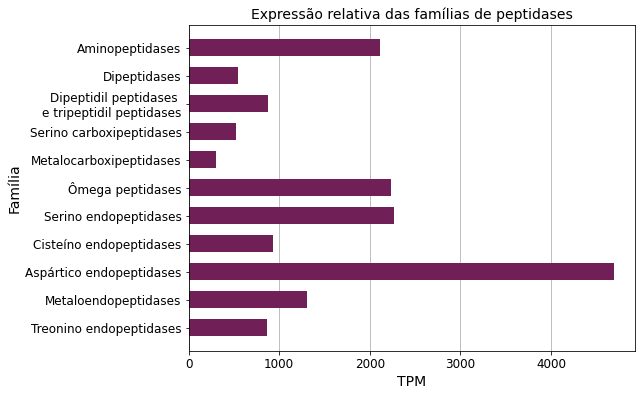

In [46]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("TPM", fontdict={"fontsize":14})
ax.set_ylabel("Família", fontdict={"fontsize":14})
plt.title("Expressão relativa das famílias de peptidases", fontdict={"fontsize":14})
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)#, rotation=45)
plt.grid(axis="x")
ax.set_axisbelow(True)

plt.barh(peptidases_df["Classe"], peptidases_df["tpm"], color= "#701F57",  height=0.6)

plt.savefig("/content/drive/MyDrive/expressao_peptidases_RMA.png", bbox_inches='tight')